# NOAA OI SST V2 High Resolution Dataset

### About the product

NOAA High-resolution Blended Analysis of Daily SST and Ice.

Seems to be widely considered a high-quality product, and is often used.

Source: Multi-satellite sensor (AVHRR+VIIRS) data.

[Dataset description](https://www.ncei.noaa.gov/products/optimum-interpolation-sst)

[Data webpage](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html)

Citation: https://doi.org/10.1175/JCLI-D-20-0166.1



### About the data

- Daily data.
- Time range: 1981 to near-present.
- 0.25° x 0.25° global coverage.
- Northern hemisphere grid (>50°N).

#### Access

- The files are opendap served at the NOAA Physical Sciences Laboratory: https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html
- Here, we load the daily mean SST. There are a bunch of other products: weekly and monthly means, anomalies, and period climatologies.
- Also has sea ice concentration

#### Versions

- Version 3.3 is the current one as of May 2024, and the one we load here.

____

## Load the dataset

Lazy loading of the oiSSTv2 data.

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import numpy as np

### Load data from one single year

In [17]:
url_oisst_v2 = ('http://www.psl.noaa.gov/thredds/dodsC/Datasets/'
 'noaa.oisst.v2.highres/sst.day.anom.2024.nc')

In [18]:
ds = xr.open_dataset(url_oisst_v2)

___

### Load all data
Concatenating annual files with`open_mfdataset`

In [25]:
all_annual_urls_oisst2_v2 = [
    (f'http://www.psl.noaa.gov/thredds/dodsC/Datasets/'
     f'noaa.oisst.v2.highres/sst.day.mean.{year}.nc')
    for year in np.arange(1981, 2025)]

In [26]:
# Lazy loading the concatenated dataset (can take a few minutes)
ds_all = xr.open_mfdataset(all_annual_urls_oisst2_v2)

___

____

### *Example:* Plot SST temperature on a particular day

##### Choose a date

In [29]:
date0 = '2019-03-02'

##### Make subsets of the files with only this date

In [30]:
ds_day = ds_all.sel(time = date0, method = 'nearest').squeeze()

**Plot SST**

Text(0.5, 0.98, 'oiSSTv2, 2019-03-02')

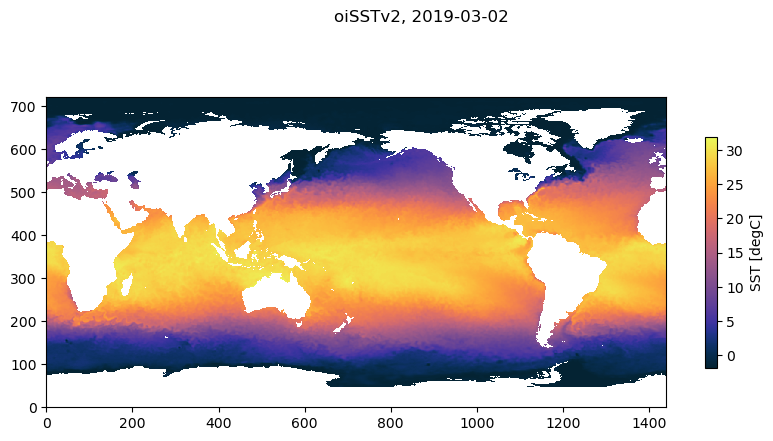

In [33]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.set_aspect('equal')


C = ax.pcolormesh(ds_day.sst, cmap = cmocean.cm.thermal)
cb = plt.colorbar(C, shrink = 0.6,
             label = 'SST [degC]')
fig.suptitle(f'oiSSTv2, {date0}')

In [32]:
ds_day

<xarray.Dataset>
Dimensions:  (lon: 1440, lat: 720)
Coordinates:
    time     datetime64[ns] 2019-03-02
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
Data variables:
    sst      (lat, lon) float32 dask.array<chunksize=(720, 1440), meta=np.ndarray>
Attributes:
    Conventions:                     CF-1.5
    title:                           NOAA High-resolution Blended Analysis: D...
    institution:                     NOAA/NCDC
    source:                          NOAA/NCDC  ftp://eclipse.ncdc.noaa.gov/p...
    history:                         Thu Aug 24 13:34:17 2017: ncatted -O -a ...
    dataset_title:                   NOAA Daily Optimum Interpolation Sea Sur...
    References:                      https://www.psl.noaa.gov/data/gridded/da...
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    comment:                         Reynolds, et al.(2007) Daily High-Resolu...
    DODS_EXTRA.Unlimited_Dimension:  time